# Importing all libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from IPython.display import YouTubeVideo
import re
import matplotlib.image as mpimg
import cv2
from IPython.display import YouTubeVideo
import glob
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2
import random
from sklearn.model_selection import train_test_split

In [ ]:
trainDataSet = tf.data.Dataset.list_files('/content/drive/My Drive/Melanoma/train*/*.jpg')
testDataSet = tf.data.Dataset.list_files('/content/drive/My Drive/Melanoma/test/*.jpg')
trainCSV = pd.read_csv('/content/drive/My Drive/Melanoma/train.csv')
testCSV = pd.read_csv('/content/drive/My Drive/Melanoma/test1.csv')

In [ ]:
print(f'Training dataset has {len(trainDataSet)} files.')
print(f'Training dataset has {len(testDataSet)} files.')
print(f'Train CSV has {len(trainCSV)} files.')
print(f'Test CSV has {len(testCSV)} files.')

Training dataset has 33126 files.
Training dataset has 10982 files.
Train CSV has 33126 files.
Test CSV has 10982 files.


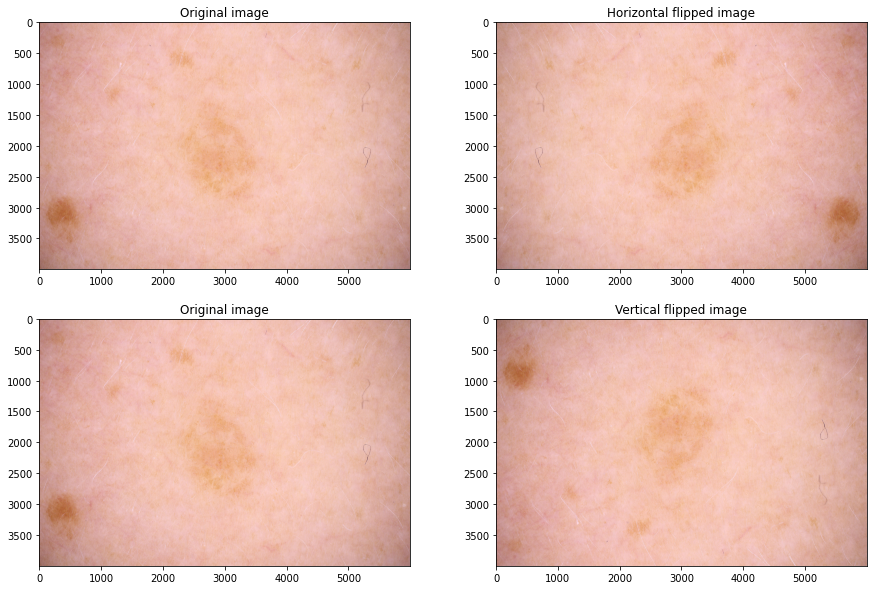

In [ ]:
# Flipping image horizontally
img = mpimg.imread('/content/drive/My Drive/Melanoma/train0/0_ISIC_8109433.jpg')
horizontalFlip = np.fliplr(img)
verticalFlip = np.flipud(img)
f, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
axis[0,0].imshow(img)
axis[0,0].set_title('Original image')
axis[0,1].imshow(horizontalFlip)
axis[0,1].set_title('Horizontal flipped image')
axis[1,0].imshow(img)
axis[1,0].set_title('Original image')
axis[1,1].imshow(verticalFlip)
axis[1,1].set_title('Vertical flipped image')
plt.show()

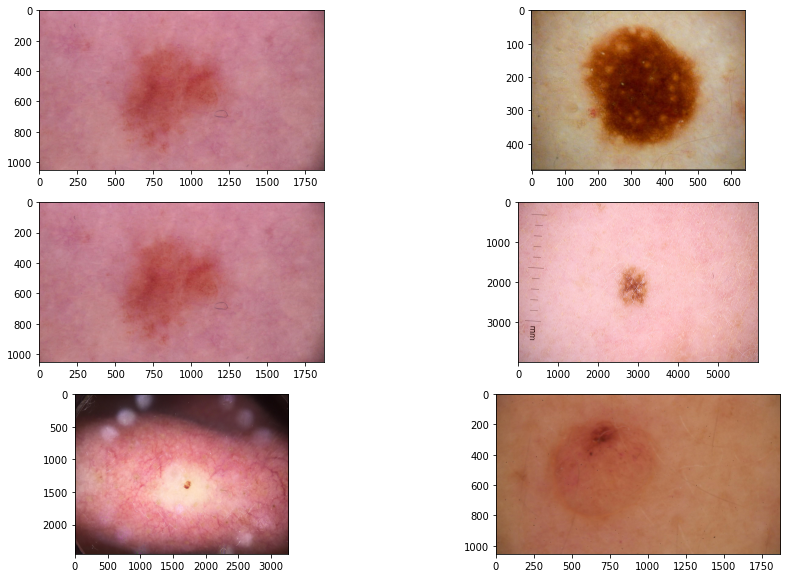

In [ ]:
img1 = mpimg.imread('/content/drive/My Drive/Melanoma/train0/0_ISIC_8973278.jpg')
img2 = mpimg.imread('/content/drive/My Drive/Melanoma/train0/0_ISIC_2482653.jpg')
img3 = mpimg.imread('/content/drive/My Drive/Melanoma/train0/0_ISIC_8973278.jpg')
img4 = mpimg.imread('/content/drive/My Drive/Melanoma/train0/0_ISIC_0641973.jpg')
img5 = mpimg.imread('/content/drive/My Drive/Melanoma/train0/0_ISIC_4573256.jpg')
img6 = mpimg.imread('/content/drive/My Drive/Melanoma/train0/0_ISIC_2795397.jpg')
f, axis = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
axis[0,0].imshow(img1)
axis[0,1].imshow(img2)
axis[1,0].imshow(img3)
axis[1,1].imshow(img4)
axis[2,0].imshow(img5)
axis[2,1].imshow(img6)
plt.show()

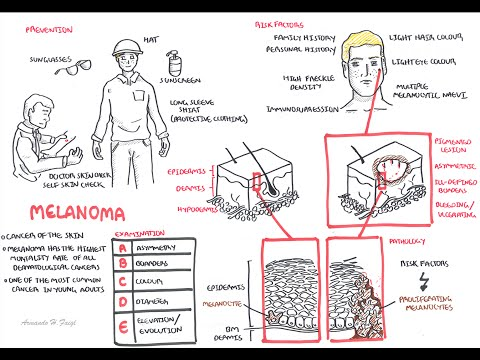

In [ ]:
YouTubeVideo('mkYBxfKDyv0', width=600, height=350)

# Data Visualization

In [ ]:
# Number of null rows in TrainCSV file
trainCSV.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [ ]:
print(f'Number of benign images are {len(trainCSV[trainCSV.target==0])}')
print(f'Number of malignant images are {len(trainCSV[trainCSV.target==1])}')

Number of benign images are 32542
Number of malignant images are 584


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


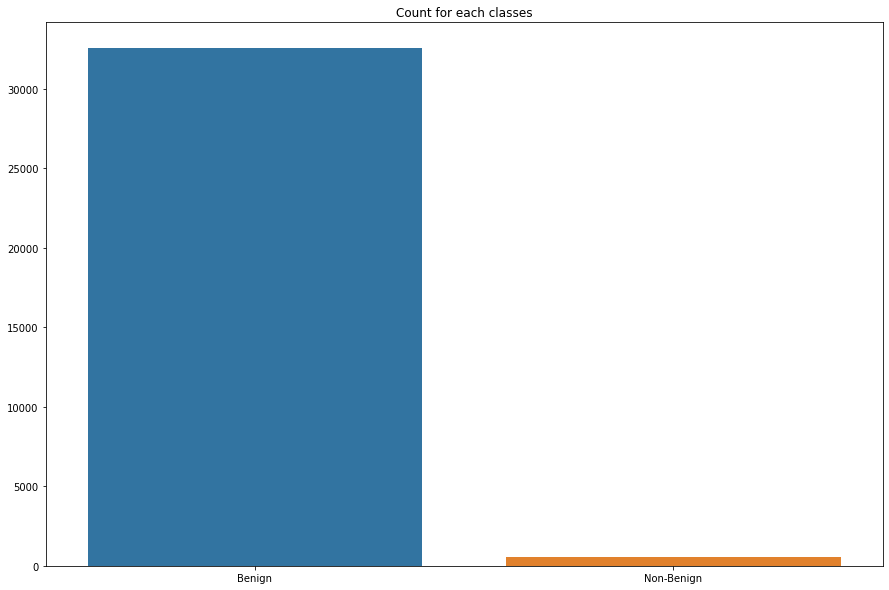

In [ ]:
benign = len(trainCSV[trainCSV.target == 0])
nonBenign = len(trainCSV[trainCSV.target == 1])
keys = ['Benign', 'Non-Benign']
values = [benign, nonBenign]
f, axis = plt.subplots(figsize=(15,10))
sns.barplot(keys, values)
plt.title('Count for each classes')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


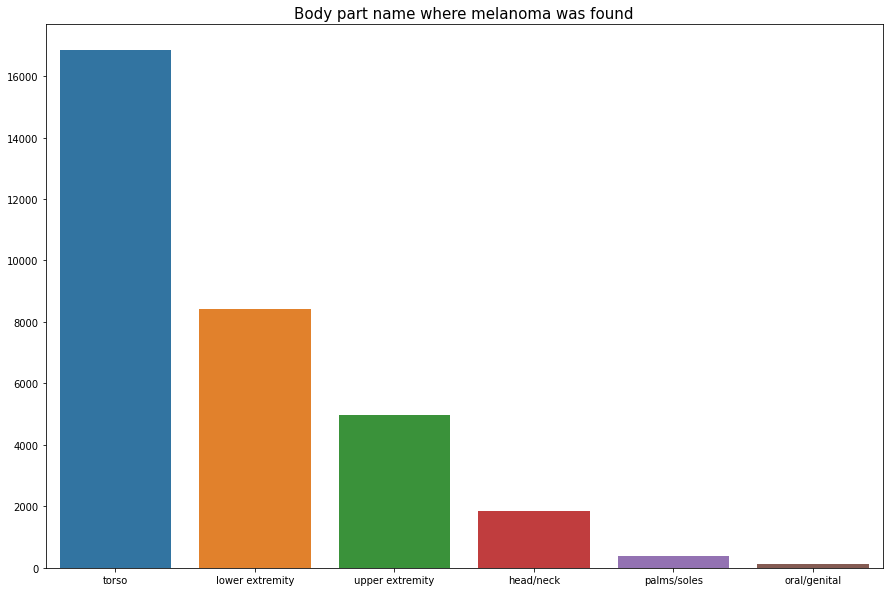

In [ ]:
keys = trainCSV['anatom_site_general_challenge'].value_counts().keys()
values = trainCSV['anatom_site_general_challenge'].value_counts().values
f, axis = plt.subplots(figsize=(15,10))
sns.barplot(keys, values)
plt.title('Body part name where melanoma was found', fontdict={'fontsize':'15'})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


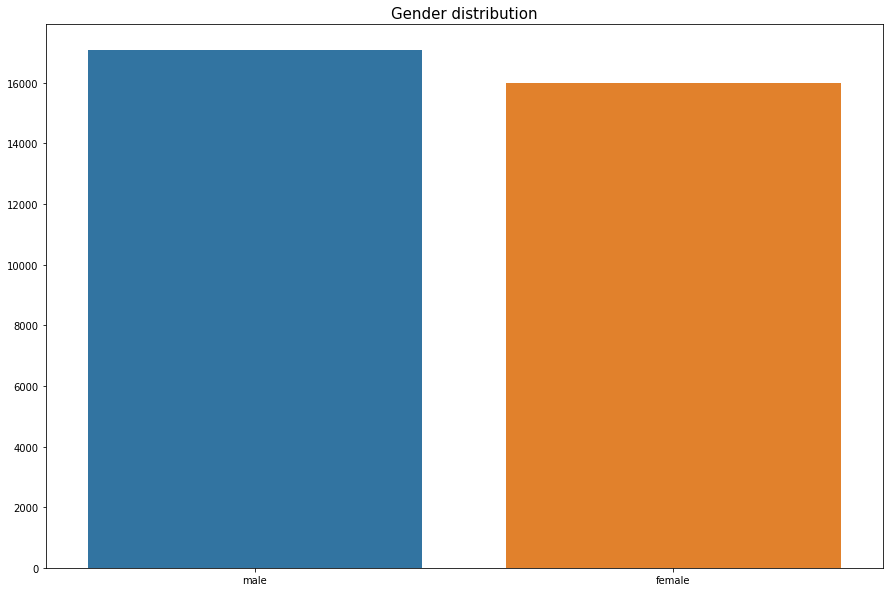

In [ ]:
key = trainCSV['sex'].value_counts().keys()
value = trainCSV['sex'].value_counts().values
f, axis = plt.subplots(figsize=(15,10))
sns.barplot(key, value)
plt.title('Gender distribution', fontdict={'fontsize':'15'})
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


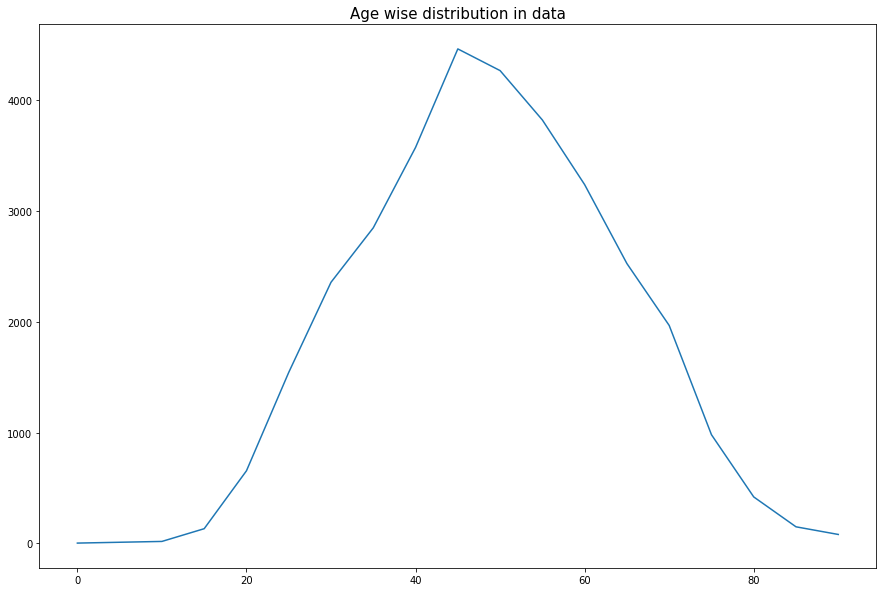

In [ ]:
key = trainCSV['age_approx'].value_counts().keys()
value = trainCSV['age_approx'].value_counts().values
f, axis = plt.subplots(figsize=(15,10))
sns.lineplot(key, value, markers=True)
plt.title('Age wise distribution in data', fontdict={'fontsize':'15'})
plt.show()

# Import data for neural network

There are multiple ways we have to train our model as we show eariler that data is highly imbalanced and due to that we have to make sure different techniques to be worked properly.
List of techniques:


1.   Normal neural nnetwork
2.   With manual weight balancing
3.   Data oversampling
4.   Data undersampling



# Kaggle submission function, which craetes submit.csv file upon creation.

In [ ]:
# Creates a function which will create file in current directory which
# we can submit to kaggle.
# def kaggleFileCSV(predictedValues, )

## Basic neural network

In [ ]:
trainFiles = glob.glob('/content/drive/My Drive/Melanoma/train*/*.jpg')

In [ ]:
# Splitting our dataset in train and validation dataset

In [ ]:
random.shuffle(trainFiles)
trainDataSet, validDataSet = train_test_split(trainFiles, test_size=0.15)

### Data helper function for simple Neural Network which returns image annd label 

In [ ]:
# Decode image and labels from tensorflow dataset API
def decodeImageAndLabels(fileNames):
  # for reading files
  bits = tf.io.read_file(fileNames)
  # Decode image will convert whole file to numpy array of shape
  # Diving by 255 is only for normalizing numpy array to give values between 0 and 1
  # To do calculations easily
  bits = tf.image.decode_jpeg(bits, channels=3) / 255
  # Resize image with given image size
  image = tf.image.resize(bits, size=[64,64])
  # Taking label from image
  tempA = tf.strings.split(fileNames, sep='/')[-1]
  tempB = tf.strings.split(tempA, sep='.')[0]
  tempC = tf.strings.split(tempB, sep='_')[0]
  tempD = tf.strings.to_number(tempC, out_type=tf.dtypes.int32)
  # Most important reshaping so that we can able to return proper shape for our
  # neural network.
  label = tf.reshape(tempD, [])
  return image, label

In [ ]:
train = tf.data.Dataset.from_tensor_slices(trainDataSet)
valid = tf.data.Dataset.from_tensor_slices(validDataSet)

In [ ]:
# Automatically finds optimum number of cores in CPU
AUTOTUNE = tf.data.experimental.AUTOTUNE
ignore_order = tf.data.Options()
# This will help us to do is ignore order so as data streams in
# it will start processing it.
ignore_order.experimental_deterministic = False
# train = train.with_options(ignore_order)
# valid = valid.with_options(ignore_order)
batch_size = 20

In [ ]:
# Map function will executed as the data manipulation is required.
train = train.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
print('Shape of image dataset.')
for img, label in train.take(3):
  print(img.shape, label.numpy())
# Creeate batch for dataset.
train = train.batch(batch_size)
# Repeat dataset infinitely
train = train.repeat()
# Prefetch a single batch before it gets processed
train = train.prefetch(AUTOTUNE)

Shape of image dataset.
(1024, 1024, 3) 0
(1024, 1024, 3) 0
(1024, 1024, 3) 0


In [ ]:
# Metric for simple Neural Network:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

### Network model

In [ ]:
# Executing only 10 epochs so we can able to know what is metric comes.

with tf.device('/device:GPU:0'):
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu', padding='same', input_shape=[1024,1024,3]),
    keras.layers.MaxPool2D(4),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(4),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(4),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(4),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    # For multiple class checking use softmax else if for single class use only sigmoid.
    keras.layers.Dense(1, activation='sigmoid')
  ])
  optimizer = keras.optimizers.Adamax()
  model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(), metrics=METRICS)
  history = model.fit(train, verbose=1, steps_per_epoch=10, epochs=10)

Epoch 1/10
10/10 [==============================] - 33s 3s/step - loss: 0.5735 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 196.0000 - fn: 4.0000 - accuracy: 0.9800 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.3469
Epoch 2/10
 4/10 [===========>..................] - ETA: 17s - loss: 0.2511 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 76.0000 - fn: 4.0000 - accuracy: 0.9500 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5066

KeyboardInterrupt: ignored

In [ ]:
valid = valid.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
valid = valid.batch(50)
valid = valid.prefetch(AUTOTUNE)
valid = valid.take(10)

In [ ]:
model.evaluate(valid)

10/10 [==============================] - 24s 2s/step - loss: 0.0738 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 493.0000 - fn: 7.0000 - accuracy: 0.9860 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6105


[0.07375162839889526,
 0.0,
 0.0,
 493.0,
 7.0,
 0.9860000014305115,
 0.0,
 0.0,
 0.610547661781311]

### Test Data helper function

In [ ]:
def testDataHelper(fileName):
  bits = tf.io.read_file(fileName)
  bits = tf.image.decode_jpeg(bits, channels=3) / 255
  image = tf.image.resize(bits, size=[512,512])
  return image

### Test dataset CSV file generation to submit on Kaggle

In [ ]:
testDataSet = tf.data.Dataset.list_files('/content/drive/My Drive/Melanoma/test/*.jpg')
data = []
for x in testDataSet:
  data.append(x.numpy().decode('utf-8').split('/')[-1].split('.')[0])
test = testDataSet.map(testDataHelper, num_parallel_calls=AUTOTUNE)
test = test.batch(50)
test = test.prefetch(AUTOTUNE)

### Model prediction for CSV file

In [ ]:
with tf.device('/device:GPU:0'):
  predictedValues = model.predict(test)

In [ ]:
submit = pd.DataFrame(columns=['image_name', 'target'])
submit.image_name = data
submit.target = predictedValues
submit.to_csv('/content/submit.csv', index=False)

In [ ]:
# With above model used accuracy falls as 50% on Kaggle test set.

## Neural network with class weights

In [ ]:
random.shuffle(trainFiles)
trainTestData, testTrainData = train_test_split(trainFiles, test_size=0.15)
trainValData, valTrainData = train_test_split(trainTestData, test_size=0.15)

### Weight trainnig function

In [ ]:
def computeClassWeights(data, **kwargs):
  trainData = data
  from sklearn.utils.class_weight import compute_class_weight
  pos, neg, labelArray = 0, 0, []
  for x in trainData:
    temp = x.split('/')[-1].split('_')[0]
    if temp == '0':
      neg += 1
    else:
      pos += 1
    labelArray.append(int(temp))
  weight_for_0, weight_for_1 = compute_class_weight(class_weight='balanced', classes=np.unique(labelArray), y =labelArray)  
  class_weights = {0:weight_for_0, 1:weight_for_1}
  if(kwargs.get('printer')):
    print(f'Positive classes are {pos} and negative classes are {neg}.')
  if(kwargs.get('returnArray')):
    return labelArray, class_weights
  return class_weights

In [ ]:
trainDataSet = tf.data.Dataset.from_tensor_slices(trainValData)
valDataSet = tf.data.Dataset.from_tensor_slices(valTrainData)

NameError: ignored

In [ ]:
# Automatically finds optimum number of cores in CPU
AUTOTUNE = tf.data.experimental.AUTOTUNE
ignore_order = tf.data.Options()
# This will help us to do is ignore order so as data streams in
# it will start processing it.
ignore_order.experimental_deterministic = False
train = trainDataSet.with_options(ignore_order)
valid = valDataSet.with_options(ignore_order)
batch_size = 180

NameError: ignored

In [ ]:
train = train.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
train = train.repeat()
train = train.batch(batch_size)
train = train.prefetch(AUTOTUNE)
valid = valid.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
valid = valid.repeat()
valid = valid.batch(batch_size)
valid = valid.prefetch(AUTOTUNE)

In [ ]:
# Metric for simple Neural Network:
# METRICS = [
#       keras.metrics.TruePositives(name='tp'),
#       keras.metrics.FalsePositives(name='fp'),
#       keras.metrics.TrueNegatives(name='tn'),
#       keras.metrics.FalseNegatives(name='fn'), 
#       keras.metrics.BinaryAccuracy(name='accuracy'),
#       keras.metrics.Precision(name='precision'),
#       keras.metrics.Recall(name='recall'),
#       keras.metrics.AUC(name='auc'),
# ]

In [ ]:
weights = computeClassWeights(trainValData)

In [ ]:
weights

{0: 0.5092777801421458, 1: 27.446100917431192}

In [ ]:
weights = {0:0.5085795824001156, 1:32.638947368421054}

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_auc',
    patience = 7,
    verbose = 1,
    mode = 'max',
    baseline = 50
)

In [ ]:
# with tf.device('/device:GPU:0'):
#   model = keras.models.Sequential([
#     keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu', padding='same', input_shape=[28,28,3]),
#     # keras.layers.MaxPool2D(2),
#     keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
#     # keras.layers.MaxPool2D(2),
#     keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
#     keras.layers.MaxPool2D(2),
#     keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
#     keras.layers.MaxPool2D(2),
#     keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'),
#     keras.layers.MaxPool2D(2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(32, activation='relu'),
#     # For multiple class checking use softmax else if for single class use only sigmoid.
#     keras.layers.Dense(1, activation='sigmoid')
#   ])
#   optimizer = keras.optimizers.Adamax()
#   model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
#   history = model.fit(train, verbose=1, steps_per_epoch=10, epochs=40, class_weight = weights, validation_data=valid, validation_steps=7, callbacks=[callback])

### Undersampling with class weights

In [ ]:
positiveFiles = glob.glob('/content/drive/My Drive/Melanoma/train*/1*.jpg')
negativeFiles = glob.glob('/content/drive/My Drive/Melanoma/train*/0*.jpg')

In [ ]:
negativeAfter = negativeFiles[:5000]
finalPaths = negativeAfter + positiveFiles
random.shuffle(finalPaths)

In [ ]:
trainTestFile, testTrainFiles = train_test_split(finalPaths, test_size=0.15)
trainValFiles, valTrainFiles = train_test_split(trainTestFile, test_size=0.15)

In [ ]:
randomSamplingTrain = tf.data.Dataset.from_tensor_slices(trainValFiles)
randomSamplingVal = tf.data.Dataset.from_tensor_slices(valTrainFiles)

In [ ]:
randomSamplingTrain = randomSamplingTrain.with_options(ignore_order)
randomSamplingTrain = randomSamplingTrain.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
randomSamplingTrain = randomSamplingTrain.batch(512)
randomSamplingTrain = randomSamplingTrain.repeat()
randomSamplingTrain = randomSamplingTrain.prefetch(AUTOTUNE)

randomSamplingVal = randomSamplingVal.with_options(ignore_order)
randomSamplingVal = randomSamplingVal.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
randomSamplingVal = randomSamplingVal.batch(512)
randomSamplingVal = randomSamplingVal.repeat()
randomSamplingVal = randomSamplingVal.prefetch(AUTOTUNE)

In [ ]:
computeClassWeights(finalPaths)

{0: 0.5584, 1: 4.780821917808219}

In [ ]:
weights = {0: 0.5584, 1: 5.780821917808219}

In [ ]:
# Try SGD, Adam and Adamax (DONE NO IMPROVEMENT)
# Increase pixel size to max 128 (DONE NO IMPROVEMENT)
# Try reducing number of samples in dataset

In [ ]:
with tf.device('/device:GPU:0'):
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=[64,64,3]),
    # keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    # keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    # keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    # keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid'),
    # keras.layers.MaxPool2D(2),
    # keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='valid'),
    # keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    # keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    # For multiple class checking use softmax else if for single class use only sigmoid.
    keras.layers.Dense(1, activation='sigmoid')
  ])
  optimizer = keras.optimizers.Adamax()
  model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
  history = model.fit(randomSamplingTrain, verbose=1, steps_per_epoch=10, epochs=40, class_weight = weights, validation_data=randomSamplingVal, shuffle=True,  validation_steps=7)

Epoch 1/40
10/10 [==============================] - ETA: 0s - loss: 0.7627 - accuracy: 0.8078 - auc: 0.5648 

In [ ]:
testDataSet = tf.data.Dataset.from_tensor_slices(testTrainData)
test = testDataSet.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
test = test.batch(150)
test = test.prefetch(AUTOTUNE)

In [ ]:
model.evaluate(test)

34/34 [==============================] - 883s 26s/step - loss: 0.7528 - tp: 88.0000 - fp: 2444.0000 - tn: 2426.0000 - fn: 11.0000 - accuracy: 0.5059 - precision: 0.0348 - recall: 0.8889 - auc: 0.7486


[0.7527621388435364,
 88.0,
 2444.0,
 2426.0,
 11.0,
 0.5059368014335632,
 0.03475513309240341,
 0.8888888955116272,
 0.7486092448234558]

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
testFiles = glob.glob('/content/drive/My Drive/Melanoma/test/*.jpg')

In [ ]:

fileNames = []
for x in testFiles:
  fileNames.append(x.split('/')[-1].split('.')[0])

In [ ]:
testDataSet = tf.data.Dataset.from_tensor_slices(testFiles)

## Test dataset helper function

In [ ]:
def testDataHelper(fileNames):
  # for reading files
  bits = tf.io.read_file(fileNames)
  # Decode image will convert whole file to numpy array of shape
  # Diving by 255 is only for normalizing numpy array to give values between 0 and 1
  # To do calculations easily
  bits = tf.image.decode_jpeg(bits, channels=3) / 255
  # Resize image with given image size
  image = tf.image.resize(bits, size=[64,64])
  # Taking label from image
  return image

In [ ]:
testDataSet = testDataSet.with_options(ignore_order)
testDataSet = testDataSet.map(testDataHelper, num_parallel_calls=AUTOTUNE)
testDataSet = testDataSet.batch(150)
testDataSet = testDataSet.prefetch(AUTOTUNE)

In [ ]:
with tf.device('/device:GPU:0'):  
  predictedValues = model.predict(testDataSet)

In [ ]:
submit = pd.DataFrame(columns=['image_name', 'target'])
submit.image_name = fileNames
submit.target = predictedValues
submit.to_csv('/content/submit.csv', index=False)

# Customized sampling

In [ ]:
def sixteenBased(negativeFilePaths):
  finalNegatives = []
  for x in range(0,32000, 1600):
    tempSet = negativeFilePaths[x:x+1600]
    random.shuffle(tempSet)
    tempSet = tempSet[:250]
    random.shuffle(tempSet)
    finalNegatives += tempSet
  random.shuffle(finalNegatives)
  return finalNegatives

## Data augmentation function

### List of augmentation techniques:
1. Flip images to 90 degress
2. Scaling of images
3. Translation
4. Adding salt and pepper noise
5. Perspective transformation
6. Change lightning condition

In [ ]:
def allAugmentation(listOfFiles):
  for y in range(len(listOfFiles)):
    x = listOfFiles[y]
    fileName = x.split('/')[-1]
    img = cv2.imread(x)
    # Flip images to 90 degress
    flip90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(f'/content/drive/My Drive/Melanoma/NewAugment/{fileName}', flip90)
    if(y % 100 == 0):
      print(y)
    # # Flip images to 180 degress
    # flip180 = cv2.rotate(img, cv2.ROTATE_180)
    # cv2.imwrite(f'/content/drive/My Drive/Melanoma/augment/{'180_'}+{fileName}', flip180)
    # # Increase brightness
    # # We increased by factor of 100, so every image will be brighten by 100 value
    # tempBright = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # vValue = tempBright[...,2]
    # tempBright[...,2] = np.where((255-vValue)<100, 255, vValue + 100)
    # tempBright = cv2.cvtColor(tempBright, cv2.COLOR_HSV2RGB)
    # cv2.imwrite(f'/content/drive/My Drive/Melanoma/augment/{'br_'}+{fileName}', tempBright)
    # # Decrease brightness
    # tempDull = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # vValue = tempDull[...,2]
    # tempDull[...,2] = np.where((255-vValue)<100, 255, vValue + 100)
    # tempDull = cv2.cvtColor(tempDull, cv2.COLOR_HSV2RGB)
    # cv2.imwrite(f'/content/drive/My Drive/Melanoma/augment/{'du_'}+{fileName}', tempBright)

In [ ]:
positiveClass = glob.glob('/content/drive/My Drive/Melanoma/train*/1*.jpg')

In [ ]:
# allAugmentation(positiveClass)

In [ ]:
allNegativeClass = glob.glob('/content/drive/My Drive/Melanoma/train*/0*.jpg')
augmentedClass = glob.glob('/content/drive/My Drive/Melanoma/NewAugment/*.jpg')
random.shuffle(allNegativeClass)
random.shuffle(augmentedClass)
random.shuffle(positiveClass)
negativeImages = allNegativeClass[:1000]
finalClass = negativeImages + positiveClass + augmentedClass
random.shuffle(finalClass)

In [ ]:
totalImages = finalClass
trainData, valData = train_test_split(totalImages, test_size=0.15)
trainImages = tf.data.Dataset.from_tensor_slices(trainData)
valImages = tf.data.Dataset.from_tensor_slices(valData)
trainImages = trainImages.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
trainImages = trainImages.repeat()
trainImages = trainImages.batch(256)
trainImages = trainImages.prefetch(AUTOTUNE)
valImages = valImages.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
# valImages = valImages.repeat()
valImages = valImages.batch(256)
valImages = valImages.prefetch(AUTOTUNE)

In [ ]:
with tf.device('/device:GPU:0'):
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=[64,64,3]),
    # keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    # keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid'),
    # keras.layers.MaxPool2D(2),
    # keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='valid'),
    # keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    # keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    # For multiple class checking use softmax else if for single class use only sigmoid.
    keras.layers.Dense(1, activation='sigmoid')
  ])
  optimizer = keras.optimizers.Adamax()
  model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
  history = model.fit(trainImages, verbose=1, steps_per_epoch=5, epochs=40, validation_data=valImages)

Epoch 1/40
5/5 [==============================] - 167s 33s/step - loss: 0.6972 - accuracy: 0.5211 - auc: 0.5138 - val_loss: 0.6915 - val_accuracy: 0.4724 - val_auc: 0.7197
Epoch 2/40
5/5 [==============================] - 98s 20s/step - loss: 0.6877 - accuracy: 0.5172 - auc: 0.5538 - val_loss: 0.6705 - val_accuracy: 0.5583 - val_auc: 0.7340
Epoch 3/40
5/5 [==============================] - 76s 15s/step - loss: 0.6689 - accuracy: 0.6156 - auc: 0.6516 - val_loss: 0.6340 - val_accuracy: 0.6626 - val_auc: 0.7390
Epoch 4/40
5/5 [==============================] - 76s 15s/step - loss: 0.6371 - accuracy: 0.6562 - auc: 0.7022 - val_loss: 0.5932 - val_accuracy: 0.7331 - val_auc: 0.7693
Epoch 5/40
5/5 [==============================] - 78s 16s/step - loss: 0.6038 - accuracy: 0.6914 - auc: 0.7345 - val_loss: 0.5522 - val_accuracy: 0.7761 - val_auc: 0.7983
Epoch 6/40
5/5 [==============================] - 75s 15s/step - loss: 0.5868 - accuracy: 0.6922 - auc: 0.7448 - val_loss: 0.5851 - val_accuracy

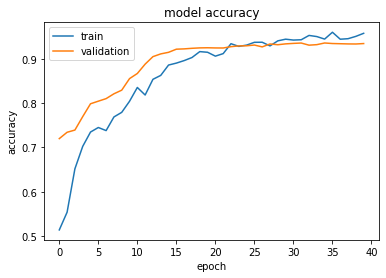

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Undersampling example accuracy: Kaggle: 76.7

In [ ]:
# Undersampling
# Positive: all
# Negative: 500

In [ ]:
positiveImages = glob.glob('/content/drive/My Drive/Melanoma/train*/1*.jpg')
negativeImages = glob.glob('/content/drive/My Drive/Melanoma/train*/0*.jpg')
random.shuffle(negativeImages)
negativeImages = negativeImages[:500]
totalImages = positiveImages + negativeImages
random.shuffle(totalImages)
trainData, valData = train_test_split(totalImages, test_size=0.15)
trainImages = tf.data.Dataset.from_tensor_slices(trainData)
valImages = tf.data.Dataset.from_tensor_slices(valData)
trainImages = trainImages.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
trainImages = trainImages.repeat()
trainImages = trainImages.batch(256)
trainImages = trainImages.prefetch(AUTOTUNE)
valImages = valImages.map(decodeImageAndLabels, num_parallel_calls=AUTOTUNE)
# valImages = valImages.repeat()
valImages = valImages.batch(256)
valImages = valImages.prefetch(AUTOTUNE)

In [ ]:
with tf.device('/device:GPU:0'):
  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=[64,64,3]),
    # keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPool2D(2),
    # keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid'),
    # keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu', padding='valid'),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    # For multiple class checking use softmax else if for single class use only sigmoid.
    keras.layers.Dense(1, activation='sigmoid')
  ])
  optimizer = keras.optimizers.Adamax()
  model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
  history = model.fit(trainImages, verbose=1, steps_per_epoch=5, epochs=50, validation_data=valImages)

Epoch 1/50
5/5 [==============================] - 127s 25s/step - loss: 0.6972 - accuracy: 0.5203 - auc: 0.4711 - val_loss: 0.6973 - val_accuracy: 0.4847 - val_auc: 0.3161
Epoch 2/50
5/5 [==============================] - 60s 12s/step - loss: 0.6913 - accuracy: 0.5445 - auc: 0.4290 - val_loss: 0.6969 - val_accuracy: 0.4847 - val_auc: 0.5677
Epoch 3/50
5/5 [==============================] - 61s 12s/step - loss: 0.6846 - accuracy: 0.5492 - auc: 0.5872 - val_loss: 0.6854 - val_accuracy: 0.4847 - val_auc: 0.6921
Epoch 4/50
5/5 [==============================] - 63s 13s/step - loss: 0.6691 - accuracy: 0.5531 - auc: 0.6589 - val_loss: 0.6686 - val_accuracy: 0.5828 - val_auc: 0.7011
Epoch 5/50
5/5 [==============================] - 61s 12s/step - loss: 0.6564 - accuracy: 0.6734 - auc: 0.6933 - val_loss: 0.6890 - val_accuracy: 0.5706 - val_auc: 0.7077
Epoch 6/50
5/5 [==============================] - 60s 12s/step - loss: 0.6517 - accuracy: 0.6586 - auc: 0.6754 - val_loss: 0.6640 - val_accuracy

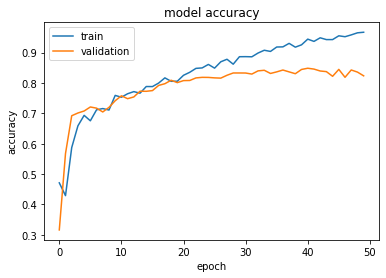

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()